In [13]:
import os
os.chdir('/home/roobz/Jupyter/afib-detector/src/')

In [14]:
import pandas as pd
import numpy as np
from wfdb_ext import Record
import wfdb, glob
from utils import convert_notebook

%load_ext autoreload
%autoreload 2

In [22]:
import etl

In [28]:
etl.generate_train_test_split_map()

In [20]:
splits = pd.read_csv('../data/cleaned/split_map.csv')
splits['duration'] = splits.end - splits.start
sizes = splits.groupby('annot').duration.sum()
sizes / sizes.max()

annot
AFIB    0.670141
AFL     0.011617
J       0.000469
N       1.000000
Name: duration, dtype: float64

In [21]:
size

NameError: name 'size' is not defined

In [16]:
np.zeros(shape=(1,2,2500))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [8]:
W = 2500
K = 5
S = 1
P = 0

W = (((W - K)/S) + 1)
W
(((W - K)/S) + 1)

2492.0

In [ ]:
[2500, 2]
[2496, 8]
[2492, 16]
[2490, 16]

In [9]:
2490* 16

39840

In [23]:
from src.etl import load_split_map, generate_train_test_split_map

In [27]:
generate_train_test_split_map()

In [35]:
gb = load_split_map().groupby('split')
gb.get_group('test')

,annot,record,split,start,end
0,AFIB,04015,test,113931,119603
1,AFIB,04015,test,133348,144517
2,AFIB,04043,test,266498,303107
3,AFIB,04043,test,2591028,2596771
4,AFIB,04043,test,2704844,2739809
...,...,...,...,...,...
494,N,08434,test,1491477,2237187
495,N,08434,test,2489167,2491706
496,N,08434,test,4806465,7006112
497,N,08455,test,936196,1872295


In [11]:
convert_notebook('notebooks/EDA.ipynb', 'reports/EDA.pdf')

In [48]:
sampling_rate=250
record = Record('data/physionet/afdb/04015', sampto=sampling_rate*60*10)

In [15]:
glob.glob('data/physionet/afdb/*.dat')

['data/physionet/afdb/08378.dat',
 'data/physionet/afdb/08434.dat',
 'data/physionet/afdb/04015.dat',
 'data/physionet/afdb/04048.dat',
 'data/physionet/afdb/05091.dat',
 'data/physionet/afdb/05121.dat',
 'data/physionet/afdb/04746.dat',
 'data/physionet/afdb/06995.dat',
 'data/physionet/afdb/08215.dat',
 'data/physionet/afdb/05261.dat',
 'data/physionet/afdb/04908.dat',
 'data/physionet/afdb/06453.dat',
 'data/physionet/afdb/04936.dat',
 'data/physionet/afdb/04043.dat',
 'data/physionet/afdb/06426.dat',
 'data/physionet/afdb/08405.dat',
 'data/physionet/afdb/04126.dat',
 'data/physionet/afdb/07879.dat',
 'data/physionet/afdb/08455.dat',
 'data/physionet/afdb/07859.dat',
 'data/physionet/afdb/07162.dat',
 'data/physionet/afdb/07910.dat',
 'data/physionet/afdb/08219.dat']

In [22]:
record_paths = pd.Series(glob.glob('data/physionet/afdb/*.dat'))
records = record_paths.str.extract('(\d+\.dat)', expand=False).str.slice(stop=-4)
records

0     08378
1     08434
2     04015
3     04048
4     05091
5     05121
6     04746
7     06995
8     08215
9     05261
10    04908
11    06453
12    04936
13    04043
14    06426
15    08405
16    04126
17    07879
18    08455
19    07859
20    07162
21    07910
22    08219
dtype: object

In [14]:
class RecordCollection():
    def __init__(data_folder):
        record_paths = pd.Series(glob.glob('data/physionet/afdb/*.dat'))
        records = record_paths.str.extract('(\d+\.dat)')
        self.records_map = {record: Re}

SyntaxError: unexpected EOF while parsing (<ipython-input-14-ef9efeadbd4d>, line 3)

/home/roobz/Jupyter/afib-detector/src/utils.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  return fig


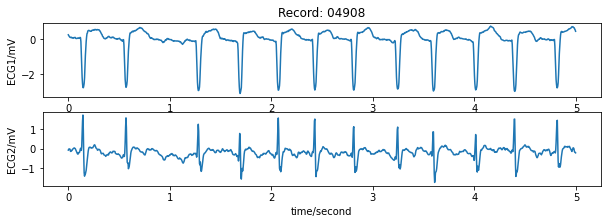

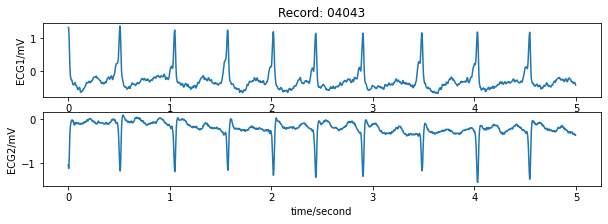

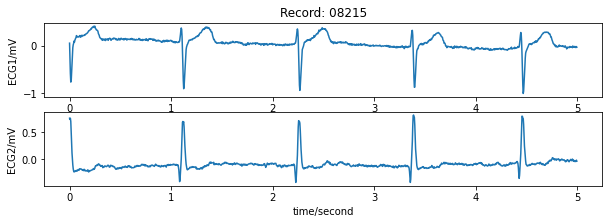

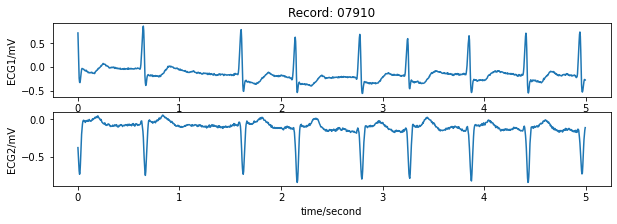

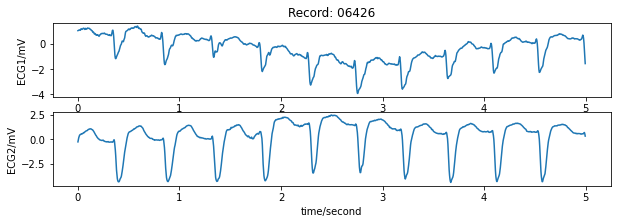

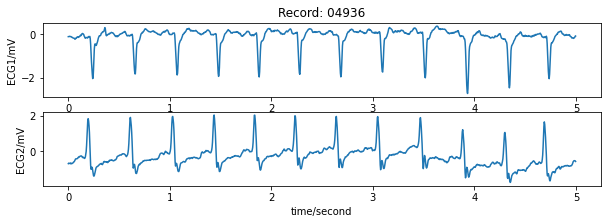

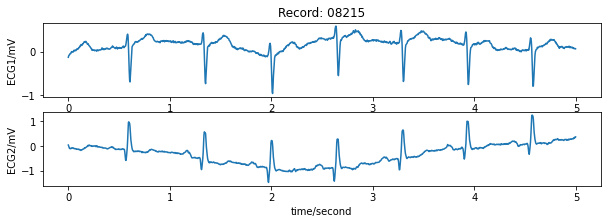

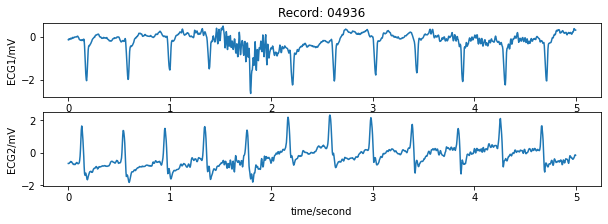

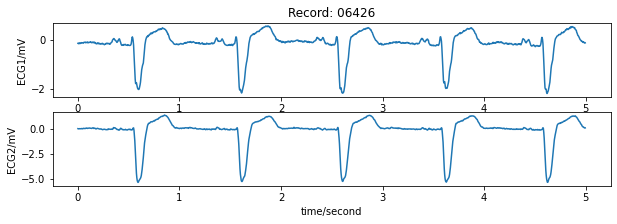

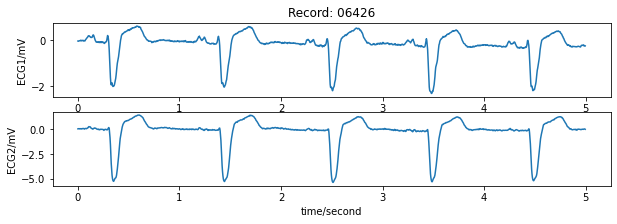

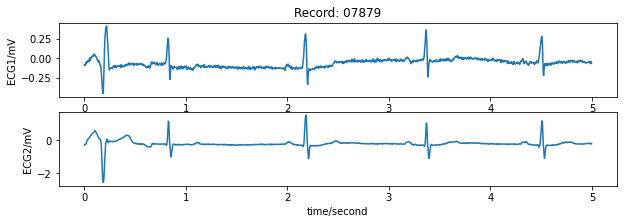

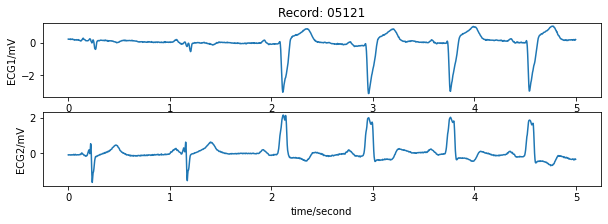

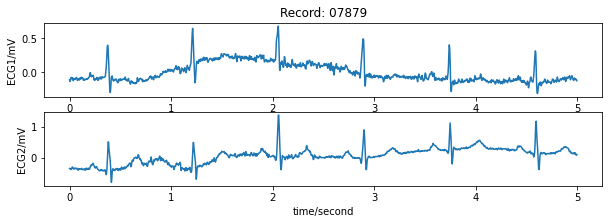

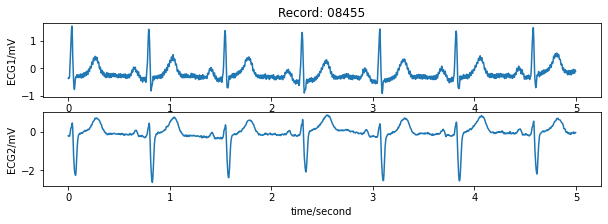

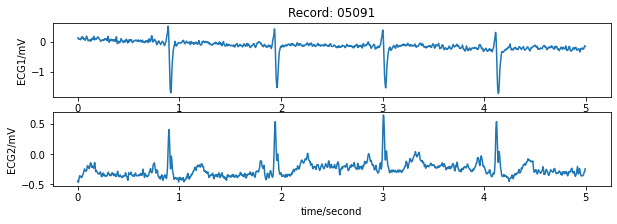

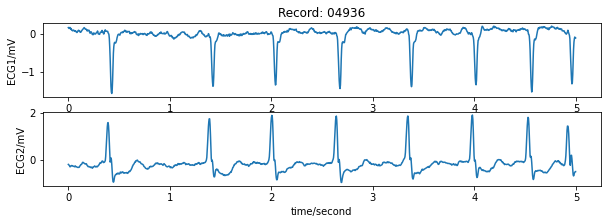

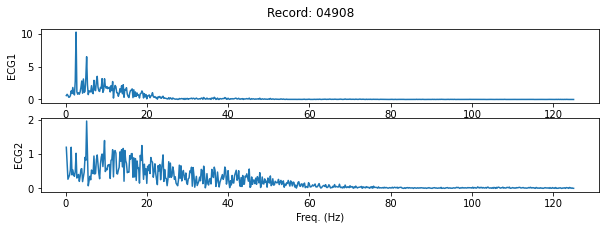

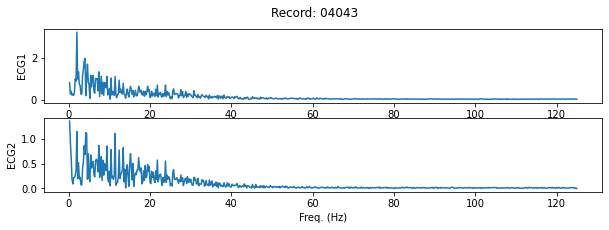

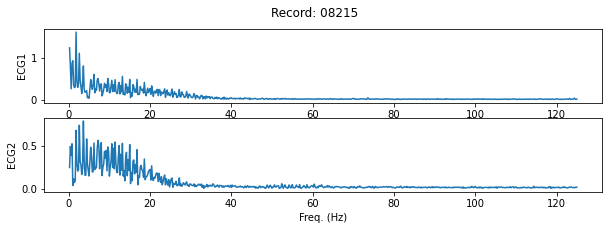

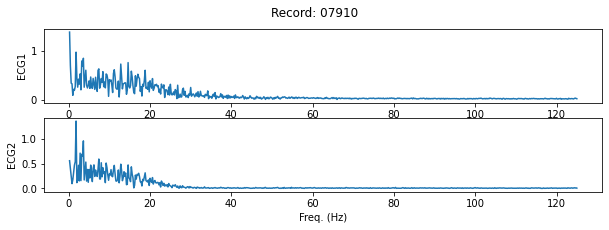

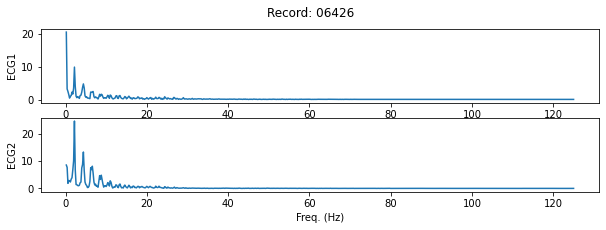

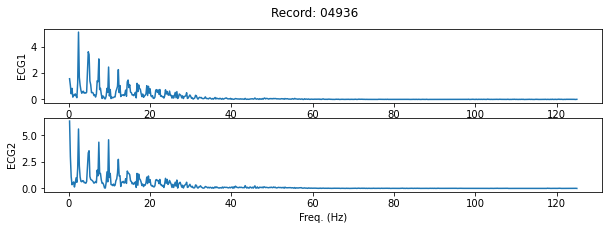

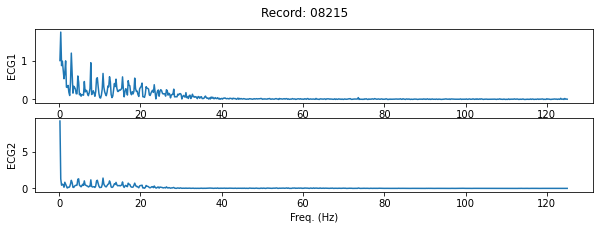

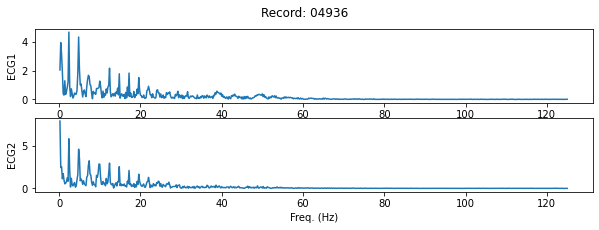

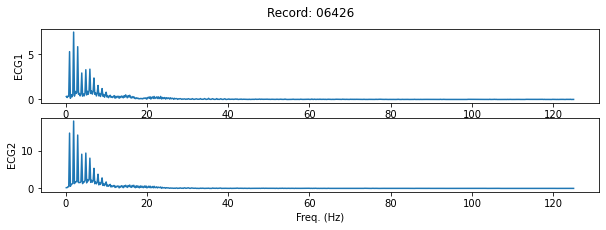

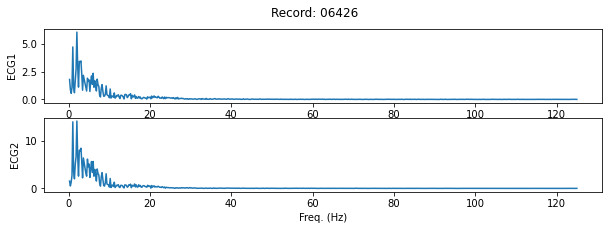

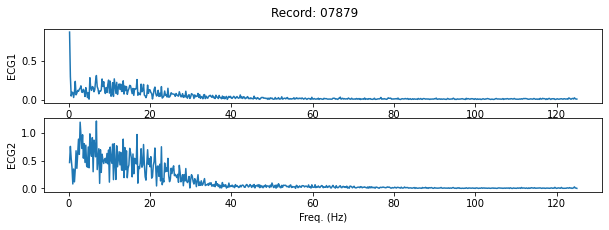

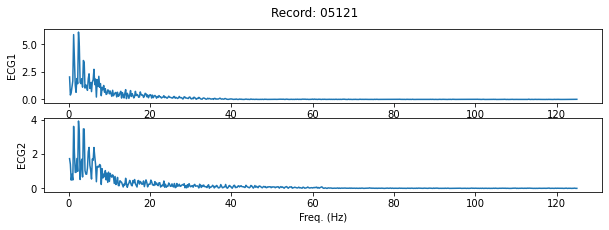

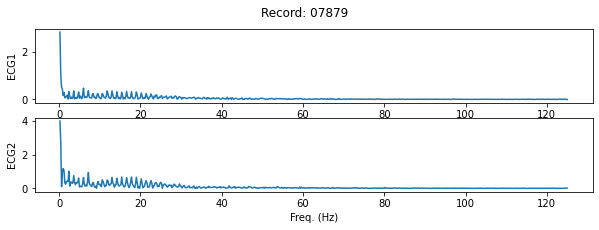

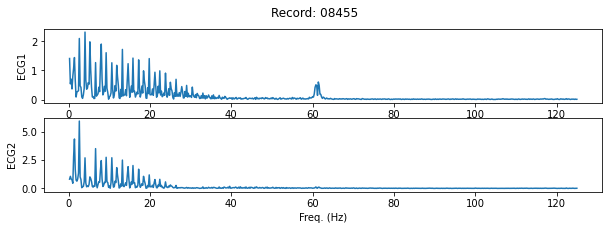

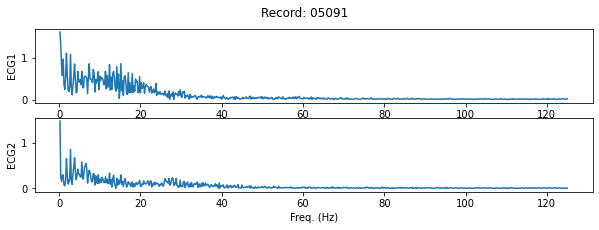

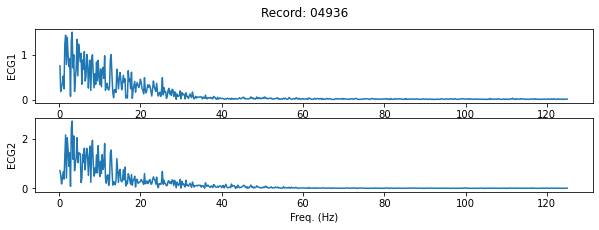

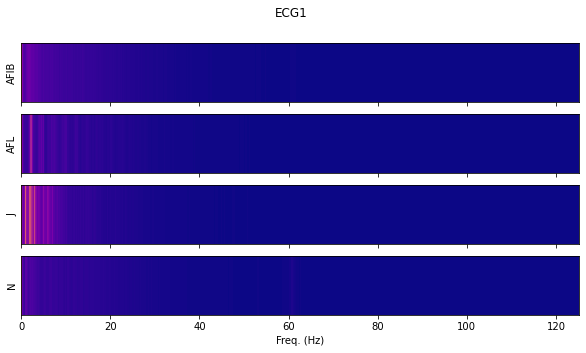

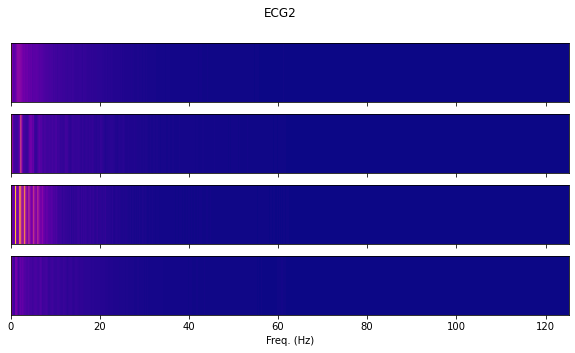

In [206]:
# make plots
eda.generate_all_plots()
# eda.generate_quad_plots(49) # random seed 49 gives good variation samples
# eda.generate_combined_mean_dft_fig(250*5, random_seed=42, samples_per_label=100)